In [1]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.linalg as lin

In [2]:
## Function for the dynamical system, competitive LV

# Note this was poorly written by me, I'll clean up redundancies later
def LV_dynamics(A_communityMatrix, x0_IC, epsilon_fpThresh, delta_timeStep, endtime): # no end time necessary
    numSteps = round(endtime/delta_timeStep)
    T_time = np.linspace(1,endtime,numSteps)
    x_point = np.matrix(np.zeros((len(x0_IC),numSteps)))
    
    A = A_communityMatrix
    x0 = np.matrix(x0_IC)
    fp = epsilon_fpThresh
    dt = delta_timeStep
    ET = endtime
    ones = np.matrix(np.ones((len(x0_IC),1)))
    
    growthRates = A*ones
    r = growthRates
    x_point[:,0] = x0.T

    
    for n in range(1,numSteps):
        dx = np.multiply(dt*x_point[:,n-1],(r - A*x_point[:,n-1]))
        if np.sqrt((dx.T * dx)[0,0]) < fp: #Assuming we've hit the fixed point
        #if np.max(abs(dx)) < fp:
            break
        x_point[:,n] = x_point[:,n-1] + dx
        
    x_point = x_point[:,0:n-1]
    #T_time = T_time[:,1:n-1]
    return x_point

In [24]:
## Many normally distributed starting points and their dynamics
def MonteCarlo_LV(n_samples, A):
    n_spec = len(A)
    x_start = np.abs(np.random.randn(n_samples, n_spec))
    x_end = np.matrix(np.zeros((n_spec, n_samples)))
    for i in range(x_start.shape[0]):
        dyn_mat = LV_dynamics(A, x_start[i,:], .001, .1, 10000)
        x_end[:,i] = dyn_mat[:,-1]
        plt.figure(i)
        for j in range(n_spec):
            plt.plot(dyn_mat[j,:].tolist()[0])
    plt.show()
    
    return x_end.T.round(2)

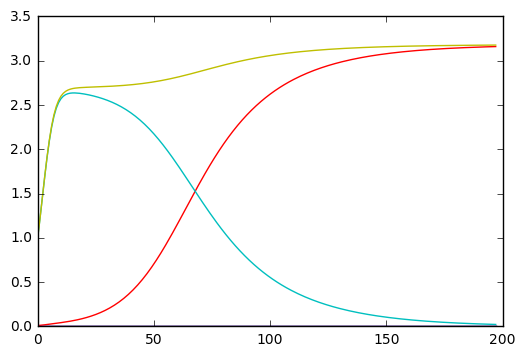

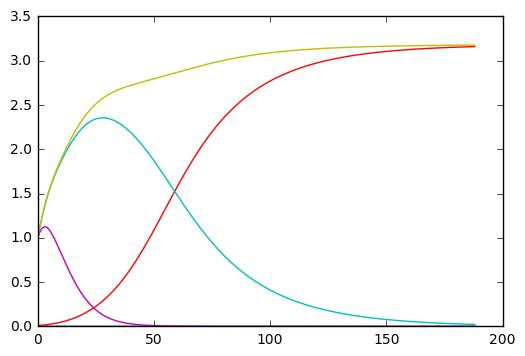

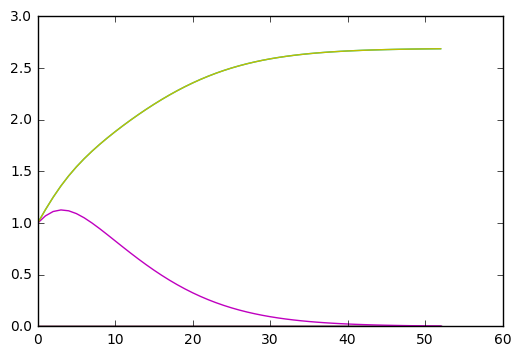

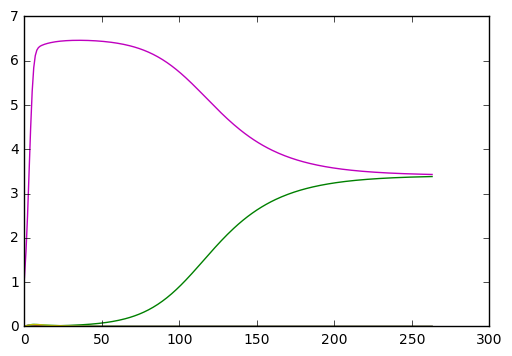

In [52]:
## Graph of single dynamic for some interesting cases
c = [1,.9,.3,.1,.3,.9]
A = lin.toeplitz(c)
## (101010) and (100100)
dyn_mat2 = LV_dynamics(A, [0,0,.01,1,0,1], .001, .1, 10000)
plt.figure(1)
for j in range(6):
    plt.plot(dyn_mat2[j,:].tolist()[0])
##
dyn_mat2 = LV_dynamics(A, [0,0,.01,1,1,1], .001, .1, 10000)
plt.figure(2)
for j in range(6):
    plt.plot(dyn_mat2[j,:].tolist()[0])
##
dyn_mat2 = LV_dynamics(A, [0,0,0,1,1,1], .001, .1, 10000)
plt.figure(3)
for j in range(6):
    plt.plot(dyn_mat2[j,:].tolist()[0])
plt.show()

## Other Example
c = [1,1.1,1.2,.91,1.2,1.1]
A = lin.toeplitz(c)
dyn_mat = LV_dynamics(A, [.01,.001,.01,.01,1.1,.01], .001, .1, 10000)
for j in range(6):
    plt.plot(dyn_mat[j,:].tolist()[0])
plt.show()


[ 3.2    1.4    1.2    0.624 -0.224 -0.224  0.624  1.4  ]


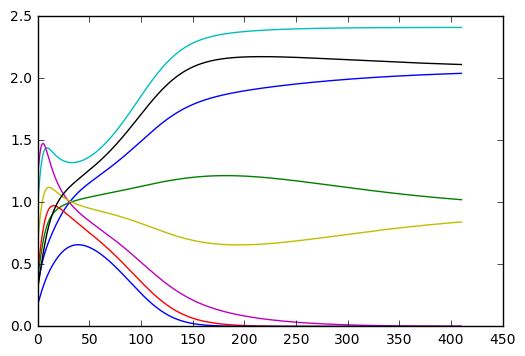

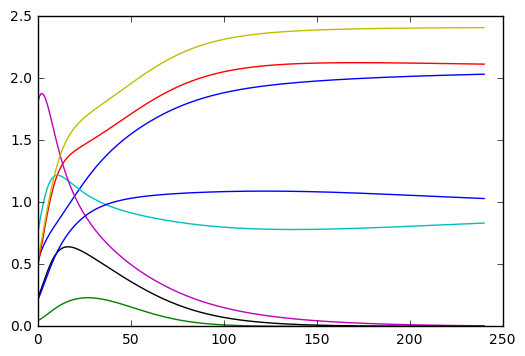

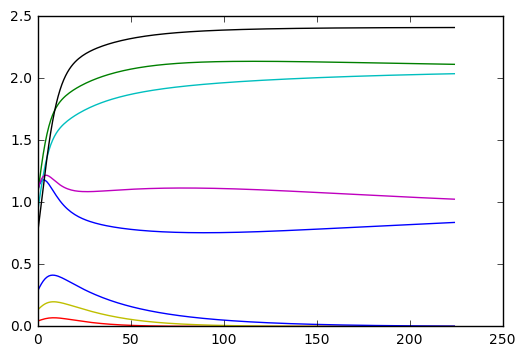

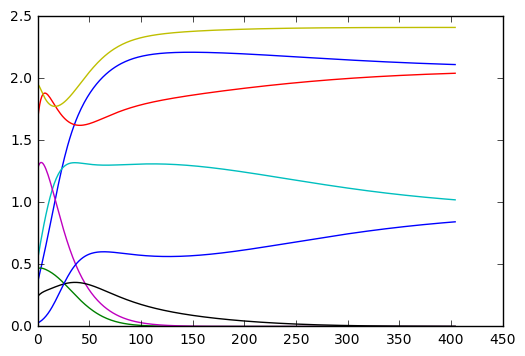

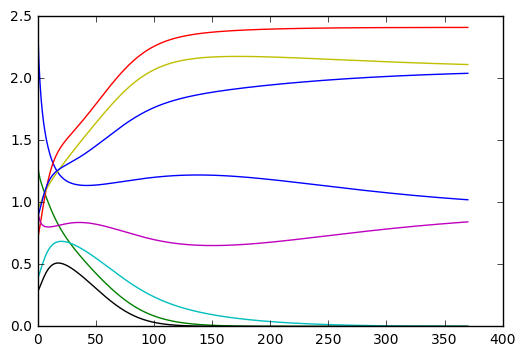

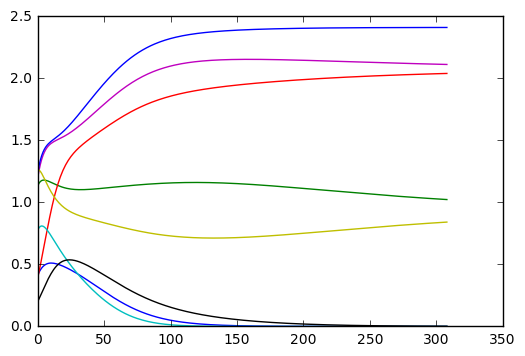

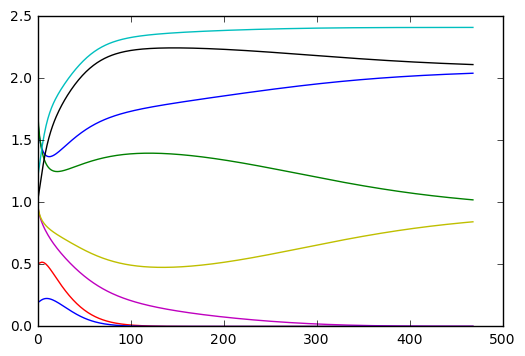

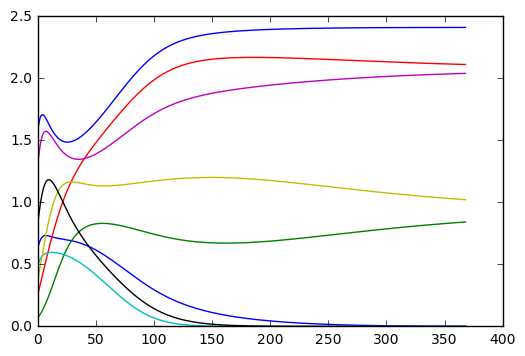

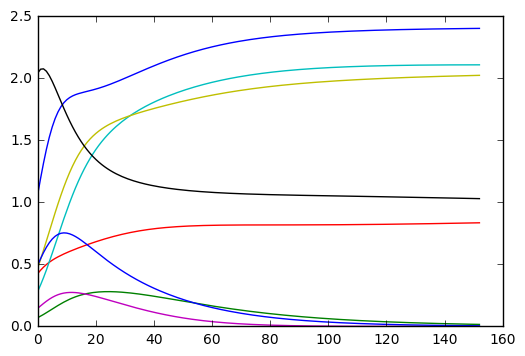

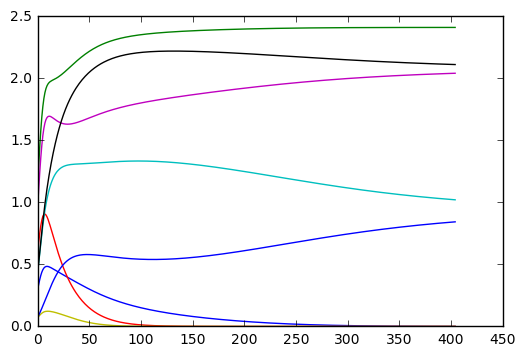

array([[ 2.04,  1.02,  0.  ,  2.41,  0.  ,  0.84,  2.11,  0.  ],
       [ 2.03,  0.  ,  2.12,  0.83,  0.01,  2.41,  0.  ,  1.03],
       [ 0.84,  2.11,  0.  ,  2.04,  1.03,  0.  ,  2.41,  0.  ],
       [ 2.11,  0.  ,  2.04,  1.02,  0.  ,  2.41,  0.  ,  0.84],
       [ 1.02,  0.  ,  2.41,  0.  ,  0.84,  2.11,  0.  ,  2.04],
       [ 0.  ,  1.02,  2.04,  0.  ,  2.11,  0.84,  0.  ,  2.41],
       [ 2.04,  1.02,  0.  ,  2.41,  0.  ,  0.84,  2.11,  0.  ],
       [ 0.  ,  0.84,  2.11,  0.  ,  2.04,  1.02,  0.  ,  2.41],
       [ 2.4 ,  0.02,  0.84,  2.11,  0.  ,  2.02,  1.03,  0.01],
       [ 0.  ,  2.41,  0.  ,  1.02,  2.04,  0.  ,  2.11,  0.84]])

In [26]:
## N = 8, solutions are not symmetric
c = [1,.4,.2,.1,.8,.1,.2,.4]
A = lin.toeplitz(c)
print(lin.eig(A)[0].round(3).real)
MonteCarlo_LV(10,A)

[ 9.2 -1.2 -0.1 -0.1 -0.9 -0.9]


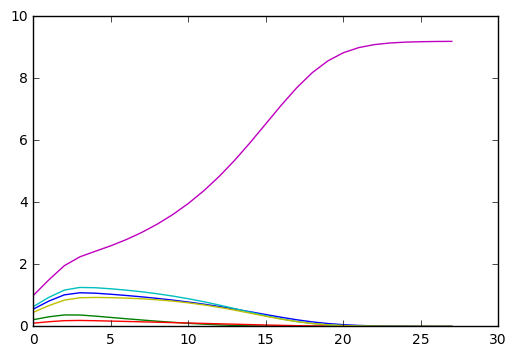

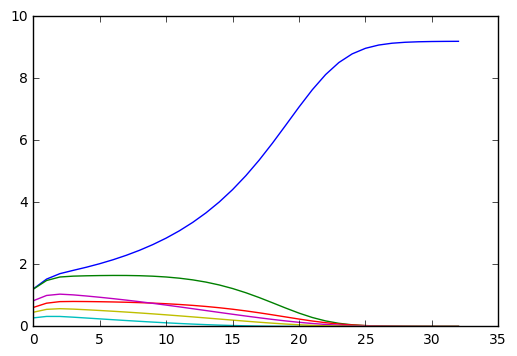

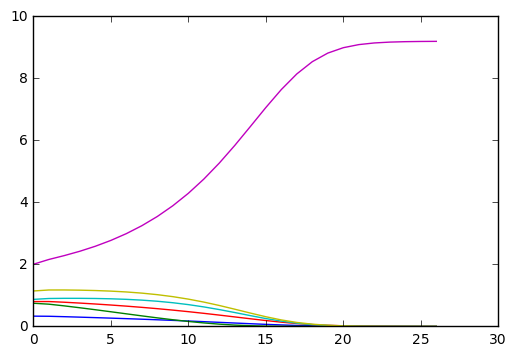

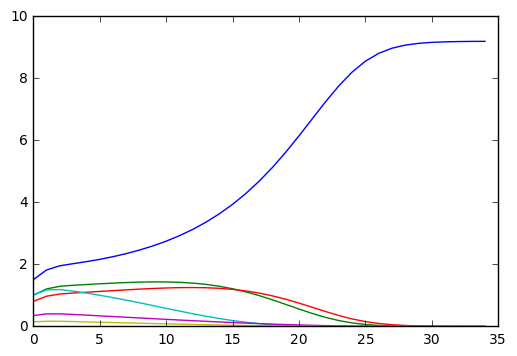

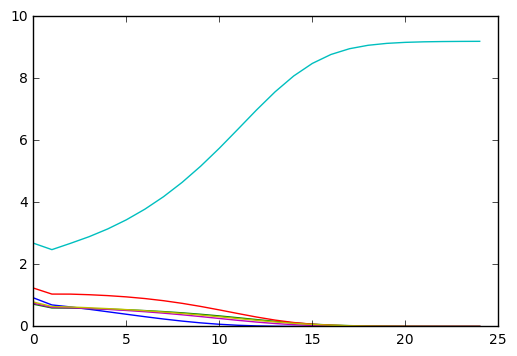

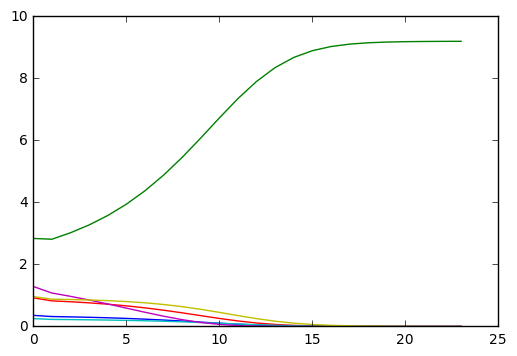

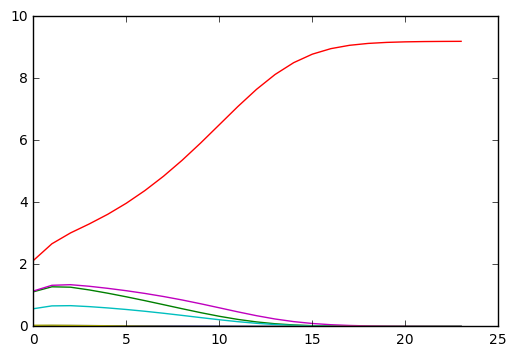

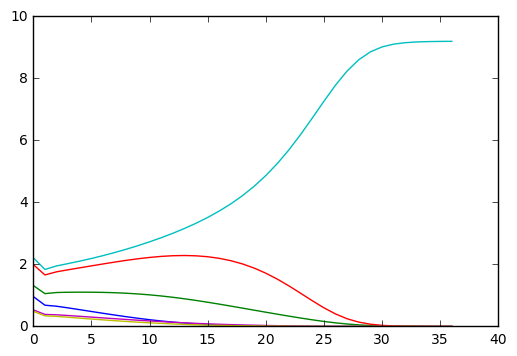

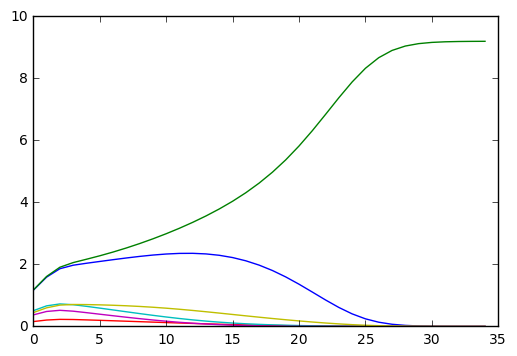

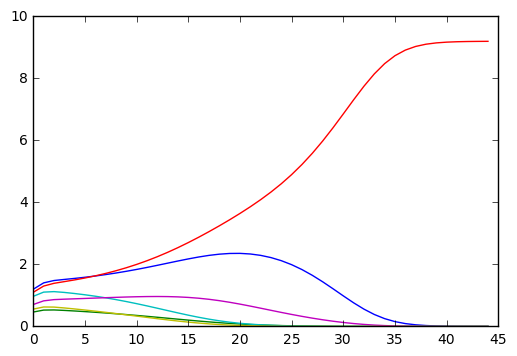

array([[ 0. ,  0. ,  0. ,  0. ,  9.2,  0. ],
       [ 9.2,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  9.2,  0. ],
       [ 9.2,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  9.2,  0. ,  0. ],
       [ 0. ,  9.2,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  9.2,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  9.2,  0. ,  0. ],
       [ 0. ,  9.2,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  9.2,  0. ,  0. ,  0. ]])

In [27]:
## All negative, only one solution
c = [1,1.6,1.5,2.0,1.5,1.6]
A = lin.toeplitz(c)
print(lin.eig(A)[0].round(3).real)
MonteCarlo_LV(10,A)